LetsGrowMore #Oct 2022

Name     : Shukla Shriya Akhilesh

Task 2   : Stock Market Prediction And Forecasting Using Stacked LSTM
 
Dataset  : https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

Importing Required Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")


Reading The Dataset

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


Data Sorting

In [6]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
df.reset_index(inplace=True)

In [9]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


Visualization


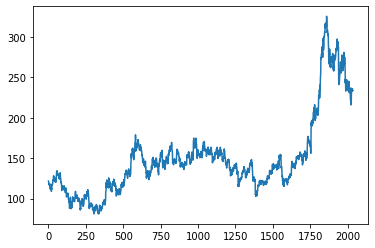

In [10]:
plt.plot(df['Close'])

In [11]:
dff=df['Close']
dff

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

Min Max Scalar

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
dff=scaler.fit_transform(np.array(dff).reshape(-1,1))
dff


array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

Splitting the Dataset

In [14]:
training_size=int(len(dff)*0.70)
test_size=len(dff)-training_size
train_data,test_data=dff[0:training_size,:],dff[training_size:len(dff),:1]

Convert an array of values into a dataset matrix

In [15]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

Splitting Data into Train and Test

In [16]:
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
print(X_train.shape), print(y_train.shape)

(1373, 50)
(1373,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(560, 50)
(560,)


(None, None)

In [19]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

Creating the LSTM Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(25,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(25,return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2700      
                                                                 
 lstm_1 (LSTM)               (None, 50, 25)            5100      
                                                                 
 lstm_2 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 12,926
Trainable params: 12,926
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_split=0.1,epochs=30,batch_size=64,verbose=1)

Epoch 1/30
20/20 [==============================] - 8s 136ms/step - loss: 0.0190 - val_loss: 0.0016
Epoch 2/30
20/20 [==============================] - 1s 73ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 3/30
20/20 [==============================] - 1s 70ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/30
20/20 [==============================] - 1s 70ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 5/30
20/20 [==============================] - 1s 70ms/step - loss: 9.9437e-04 - val_loss: 0.0013
Epoch 6/30
20/20 [==============================] - 1s 70ms/step - loss: 9.5558e-04 - val_loss: 0.0013
Epoch 7/30
20/20 [==============================] - 1s 70ms/step - loss: 9.2705e-04 - val_loss: 0.0013
Epoch 8/30
20/20 [==============================] - 2s 77ms/step - loss: 8.9915e-04 - val_loss: 0.0012
Epoch 9/30
20/20 [==============================] - 1s 69ms/step - loss: 8.7476e-04 - val_loss: 0.0012
Epoch 10/30
20/20 [==============================] - 1s 69ms/step - loss: 8.4103e-04 - v

Prediction And Checking Performance

In [23]:
test_predict=model.predict(X_test)

In [24]:
test_predicted=scaler.inverse_transform(test_predict)
test_predicted

array([[126.35498 ],
       [126.28453 ],
       [126.20189 ],
       [126.21658 ],
       [126.408455],
       [126.89767 ],
       [127.642914],
       [128.55594 ],
       [129.55658 ],
       [130.49643 ],
       [131.30597 ],
       [131.93817 ],
       [132.35461 ],
       [132.57648 ],
       [132.6372  ],
       [132.48808 ],
       [132.15807 ],
       [131.82906 ],
       [131.51685 ],
       [131.23447 ],
       [131.0592  ],
       [130.93275 ],
       [131.0441  ],
       [131.5123  ],
       [132.38297 ],
       [133.53998 ],
       [134.75781 ],
       [135.79478 ],
       [136.62775 ],
       [137.26996 ],
       [137.86826 ],
       [138.47823 ],
       [138.90883 ],
       [139.08864 ],
       [139.00691 ],
       [138.74425 ],
       [138.35938 ],
       [137.95738 ],
       [137.68405 ],
       [137.48735 ],
       [137.3905  ],
       [137.40923 ],
       [137.53664 ],
       [137.72798 ],
       [137.91653 ],
       [138.1114  ],
       [138.3073  ],
       [138.5

Calculating Performance

In [25]:
import math
from sklearn.metrics import mean_squared_error

In [26]:
performance = math.sqrt(mean_squared_error(ytest,test_predict))
performance

0.07239122882971297